# Goods Recommandation by the Tompson Sampling-based AI engine

In [25]:
## Declare Packages tu Use 
using Distributions
using Formatting
using Plots
using Zygote
using Random

## Basic Functions
function cost_ts(S_W, S_B, F_W, F_B, means, mx)
    S = S_W * mx + S_B
    F = F_W * mx + F_B
    probs = rand.(Normal.(S, abs.(F)))
    p_arm = argmax(probs)
    rand(Uniform())<means[p_arm] ? (1-probs[p_arm])^2 : (0 -probs[p_arm])^2
end

cost_ts (generic function with 1 method)

## Original code

In [29]:
## Training
function train(
    N = 3,
    means_l = [[0.3, 0.7, 0.5], [0.3, 0.7, 0.5]],
    Nepoch = 100)

    S_W = zeros(Float64, N)
    S_B = zeros(Float64, N)
    F_W = zeros(Float64, N)
    F_B = zeros(Float64, N)

    S = zeros(Float64, N)
    F = zeros(Float64, N)
    
    S_list = zeros(Float64, Nepoch+1, N)
    S_list[1,:] = S
    F_abs_list = zeros(Float64, Nepoch+1, N)
    F_abs_list[1,:] = abs.(F)

    mx = 1
    μ = 0.01
    for epoch in range(1, Nepoch)
        G_all = gradient((S_W, S_B, F_W, F_B) -> cost_ts(S_W, S_B, F_W, F_B, means_l[mx],mx), S_W, S_B, F_W, F_B)
        S_W -= μ * G_all[1]
        S_B -= μ * G_all[2]
        F_W -= μ * G_all[3]
        F_B -= μ * G_all[4]    
        S = S_W * mx + S_B
        F = F_W * mx + F_B
        S_list[epoch+1,:] = S    
        F_abs_list[epoch+1,:] = abs.(F)
    end
    return S_list, F_abs_list
end

train (generic function with 4 methods)

In [30]:
N = 3
means_l = [[0.3, 0.7, 0.5], [0.3, 0.7, 0.5]]
Nepoch = 2000
S_list, F_abs_list = train(N, means_l, Nepoch);

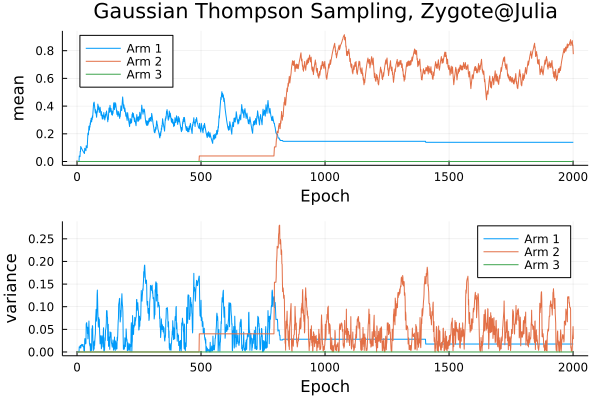

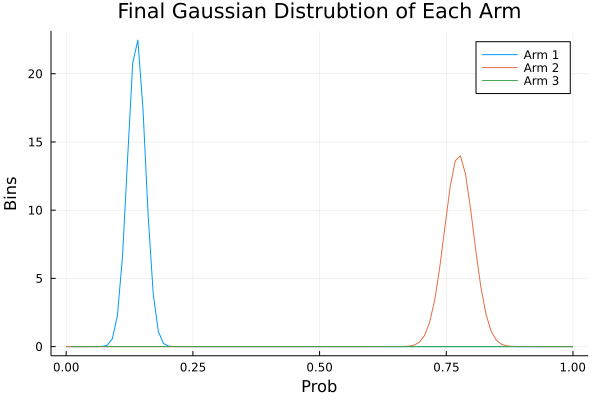

[[0.3, 0.7, 0.5], [0.3, 0.7, 0.5]]


In [31]:
## Result Plotting
println(means_l)
p1 = plot(range(1,Nepoch+1), S_list, ylabel="mean", 
    title = "Gaussian Thompson Sampling, Zygote@Julia", legend=:topleft,
    label = ["Arm 1" "Arm 2" "Arm 3"])
p2 = plot(range(1,Nepoch+1), F_abs_list, ylabel="variance",
    label = ["Arm 1" "Arm 2" "Arm 3"])
h = plot(p1, p2, xlabel="Epoch", layout = (2,1))
display(h)

lo, hi = 0., 1.
x = range(lo, hi; length = 100)
Y = []
for i in range(1,N)
    y = pdf.(Normal(S_list[end,i],abs.(F_abs_list[end,i])),x)
    if i == 1
        Y = y
    else
        Y = [Y y]
    end
end

h = plot(x, Y, xlabel = "Prob", ylabel = "Bins", 
    title = "Final Gaussian Distrubtion of Each Arm", 
    label = ["Arm 1" "Arm 2" "Arm 3"])
display(h)

## Test Codes

In [ ]:
mx = 2
means = means_l[mx]
println(size(means))
println(cost_ts(S_W,S_B,F_W,F_B,means_l[mx],mx))
gradient((S_W, S_B, F_W, F_B) -> cost_ts(S_W, S_B, F_W, F_B, means_l[mx],mx), S_W, S_B, F_W, F_B)

In [ ]:
zeros(Int, 2, 2, 2) == zeros(Int, (2, 2, 2))

In [ ]:
zeros(Int, (2, 2))